In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.patches as mpatches

from matplotlib import pyplot, dates
from datetime import datetime
import seaborn as sns
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'24',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
poland = pd.read_csv('../data/poland_restrictions.csv')
sweden = pd.read_csv('../data/sweden_restrictions.csv')

In [3]:
poland['Date'] = poland['Date'].astype('datetime64[ns]')
sweden['Date'] = sweden['Date'].astype('datetime64[ns]')
poland['Event'] = poland['Event'].str.wrap(40) 
sweden['Event'] = sweden['Event'].str.wrap(40) 


In [4]:
date = list(poland['Date']) + list(sweden['Date'])

In [5]:
sweden



,Event,Date
0,First case,2020-01-31
1,Banning all gatherings larger than 500\npeople.,2020-02-11
2,Cancellation of mass event over 50\npeople. Cu...,2020-03-27
3,New restrictions to bars and restaurants\nrequ...,2020-03-24
4,All private visits to nursing homes are\nbanned.,2020-04-01


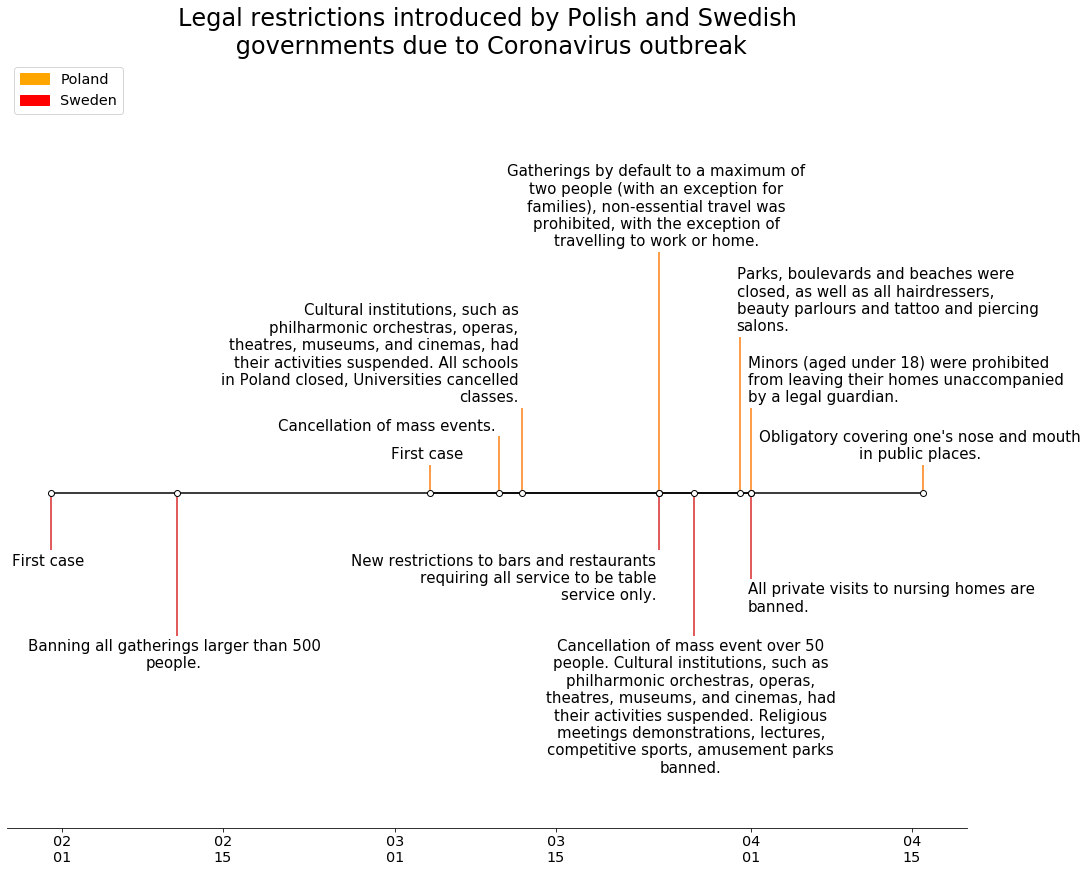

In [8]:
sweden_levels = np.array([-2, -5, -5, -2, -3])

poland_levels = np.array([1, 2, 3, 8.5, 5.5, 3, 1])

fig, ax = plt.subplots(figsize=(15, 12), constrained_layout=True)
ax.set(title="Legal restrictions introduced by Polish and Swedish\n governments due to Coronavirus outbreak")

ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

xaxis = dates.date2num(date)    # Convert to maplotlib format
hfmt = dates.DateFormatter('%m\n%d')
ax.xaxis.set_major_formatter(hfmt)    

s_markerline, s_stemline, s_baseline = ax.stem(sweden['Date'], sweden_levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

p_markerline, p_stemline, p_baseline = ax.stem(poland['Date'], poland_levels,
                                         linefmt="C1-", basefmt="k-",
                                         use_line_collection=True)


plt.setp(s_markerline, mec="k", mfc="w", zorder=3)
plt.setp(p_markerline, mec="k", mfc="w", zorder=3)


# Shift the markers to the baseline by replacing the y-data by zeros.
s_markerline.set_ydata(np.zeros(len(sweden['Date'])))
p_markerline.set_ydata(np.zeros(len(poland['Date'])))


s_vert = np.array(['top', 'bottom'])[(sweden_levels > 0).astype(int)]
for i, (d, l, r, va) in enumerate(zip(sweden['Date'], sweden_levels, sweden['Event'], s_vert)):
    if i == 3:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right", size=15)      
    elif i == 4:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="left", size=15)               
    else:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center", size=15)    
        
        
p_vert = np.array(['top', 'bottom'])[(poland_levels > 0).astype(int)]
for i, (d, l, r, va) in enumerate(zip(poland['Date'], poland_levels, poland['Event'], p_vert)):
    if i in [2, 1]:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right", size=15)       
    elif i in [4,5]:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="left", size=15)           
    else:
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center", size=15)           
        
        
ax.margins(y=0.5)
legend_elements = [
    mpatches.Patch(color='orange', label='Poland'),
    mpatches.Patch(color='red', label='Sweden')]
ax.legend(handles=legend_elements, loc='upper left')       

plt.savefig("../figures/restrictions.png", 
               bbox_inches='tight', 
               dpi=300,
               pad_inches=0.5)

plt.show() 